# Neural Network Training: Learning from Collected Data

Load the collected dataset `training_data.csv`, build a Keras regression model, train it,
and save the trained model to `model.h5`. Also plots training/validation loss over epochs.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the dataset
data = pd.read_csv('training_data.csv')

print("\nOriginal data description:")
print(data.describe())


Original data description:
                  x             y         theta        goal_x        goal_y  \
count  39450.000000  39450.000000  39450.000000  39450.000000  39450.000000   
mean      -0.149199      1.498079     -0.011018     -0.126884      1.773540   
std        4.451537      2.077178      1.338283      4.669891      2.578674   
min       -7.208608     -4.704993     -3.141558     -6.790000     -4.160000   
25%       -4.314594      0.369666     -0.995501     -4.880000      0.170000   
50%        0.517870      1.333788     -0.032790      0.940000      2.990000   
75%        3.633787      3.354036      0.972216      3.940000      3.930000   
max        7.007280      4.959672      3.141246      6.830000      4.520000   

       goal_theta             v             w  
count     39450.0  39450.000000  39450.000000  
mean          0.0      0.061070      0.006206  
std           0.0      0.222994      0.322687  
min           0.0     -0.260000     -1.820000  
25%           0.0   

In [ ]:
# Shuffle the rows so that training/test splits are randomized.
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract input features (state + goal) - EXCLUDING goal_theta
# Input features are now: x, y, theta, goal_x, goal_y
X = data[['x', 'y', 'theta', 'goal_x', 'goal_y', 'goal_theta']].values
y = data[['v', 'w']].values

In [ ]:
# Split into training (80%) and validation (20%)
train_ratio = 0.8
num_samples = X.shape[0]
num_train = int(train_ratio * num_samples)

X_train = X[:num_train]
y_train = y[:num_train]
X_val   = X[num_train:]
y_val   = y[num_train:]

print(f"\nTotal samples: {num_samples}")
print(f"Training samples: {X_train.shape[0]}, Features: {X_train.shape[1]}")
print(f"Validation samples: {X_val.shape[0]}, Features: {X_val.shape[1]}")


Total samples: 39450
Training samples: 31560, Features: 6
Validation samples: 7890, Features: 6


In [ ]:
# Modified Architecture
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(6,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import matplotlib.pyplot as plt
# Train the model
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)])


Epoch 1/150
987/987 - 9s - 9ms/step - loss: 0.0524 - val_loss: 0.0453
Epoch 2/150
987/987 - 4s - 4ms/step - loss: 0.0442 - val_loss: 0.0411
Epoch 3/150
987/987 - 4s - 4ms/step - loss: 0.0407 - val_loss: 0.0415
Epoch 4/150
987/987 - 6s - 6ms/step - loss: 0.0385 - val_loss: 0.0364
Epoch 5/150
987/987 - 4s - 4ms/step - loss: 0.0368 - val_loss: 0.0365
Epoch 6/150
987/987 - 7s - 7ms/step - loss: 0.0353 - val_loss: 0.0335
Epoch 7/150
987/987 - 5s - 5ms/step - loss: 0.0349 - val_loss: 0.0336
Epoch 8/150
987/987 - 4s - 5ms/step - loss: 0.0338 - val_loss: 0.0328
Epoch 9/150
987/987 - 6s - 6ms/step - loss: 0.0334 - val_loss: 0.0327
Epoch 10/150
987/987 - 5s - 5ms/step - loss: 0.0325 - val_loss: 0.0312
Epoch 11/150
987/987 - 6s - 6ms/step - loss: 0.0319 - val_loss: 0.0316
Epoch 12/150
987/987 - 9s - 9ms/step - loss: 0.0314 - val_loss: 0.0368
Epoch 13/150
987/987 - 5s - 5ms/step - loss: 0.0310 - val_loss: 0.0295
Epoch 14/150
987/987 - 5s - 5ms/step - loss: 0.0305 - val_loss: 0.0288
Epoch 15/150
98

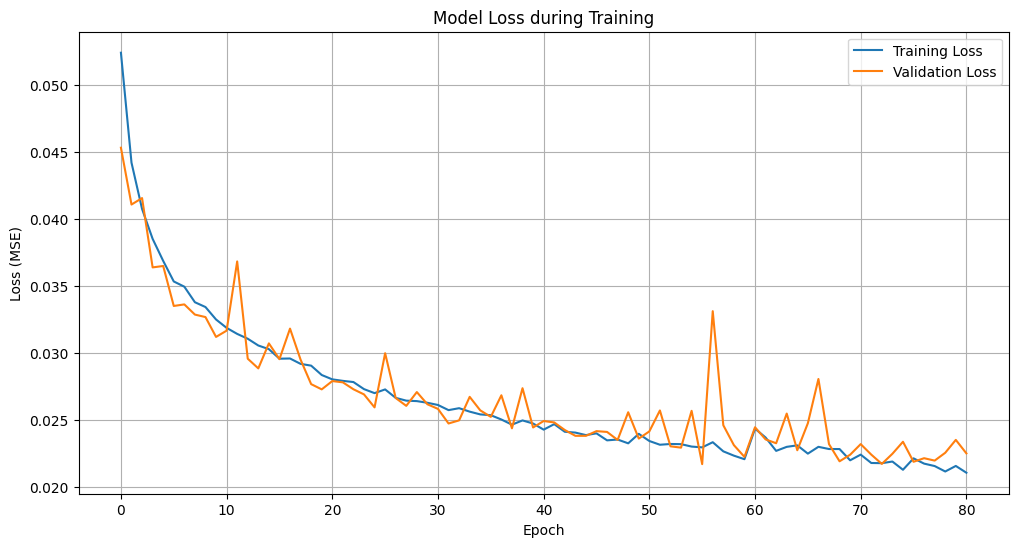

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save the Trained Model to H5
model.save('model.h5')